#Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

#Loading Our dataset

In [30]:
data = pd.read_csv('/content/CreditOne (1).csv')

###Showing the first five rows of the dataset

In [31]:
data.head()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,18449,18246,440000,male,graduate school,1,79,0,0,0,0,0,0,429309,437906,447326,447112,438187,447543,15715,16519,16513,15800,16531,15677,not default
1,450,247,250000,female,university,1,75,0,-1,-1,-1,-1,-1,52874,1631,1536,1010,5572,794,1631,1536,1010,5572,794,1184,not default
2,25340,25137,180000,male,graduate school,1,75,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,default
3,25345,25142,210000,male,university,1,75,0,0,0,0,0,0,205601,203957,199882,203776,205901,210006,9700,8810,9000,7300,7500,7600,not default
4,29379,29176,160000,female,high school,1,74,0,0,0,-1,-1,-1,79201,69376,66192,16905,0,19789,3783,2268,16905,0,19789,26442,not default


In [32]:
data.describe()

,index,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,30201.000000,3.020100e+04,30201.000000,30201.000000,30201.000000,30201.000000,3.020100e+04,30201.000000,30201.000000,30201.000000,30201.000000
mean,15102.986689,14901.337737,167487.820933,1.552498,35.478693,-0.016258,-0.134002,-0.165789,-0.220887,-0.265687,-0.290984,51188.779478,49157.028178,4.698593e+04,43251.461044,40298.342671,38853.185557,5659.237674,5.907429e+03,5225.712824,4833.661766,4800.261746,5208.025297
std,8718.444980,8716.135449,129796.847781,0.521936,9.221991,1.123603,1.197524,1.197333,1.168877,1.133420,1.150480,73624.394836,71182.805014,6.936401e+04,64464.295333,60857.808624,59613.297792,16524.918712,2.297234e+04,17586.184822,15697.560886,15295.706808,17737.406997
min,1.000000,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7553.000000,7350.000000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.000000,2988.000000,2.670000e+03,2329.000000,1762.000000,1254.000000,1000.000000,8.300000e+02,390.000000,296.000000,256.000000,112.000000
50%,15103.000000,14900.000000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22343.000000,21145.000000,2.008200e+04,19034.000000,18091.000000,17041.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22653.000000,22450.000000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67002.000000,63883.000000,6.003900e+04,54426.000000,50133.000000,49104.000000,5006.000000,5.000000e+03,4500.000000,4013.000000,4022.000000,4000.000000
max,30203.000000,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


#Checking for null values

In [33]:
#counting the NaN values in a column in pandas DataFrame
data.isnull().sum()

index                         0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Since we dont have null values in  our dataset we go ahead to visualize

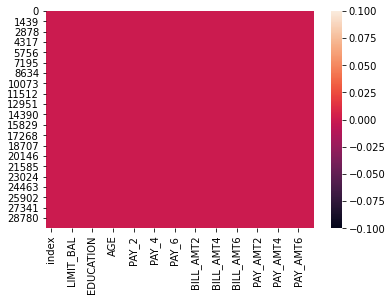

In [34]:
#displaying numeric tabular data where the cells are colored depending upon the contained value.
sns.heatmap(data.isnull())

Text(0.5, 1.0, 'AGE DISTRIBUTION')

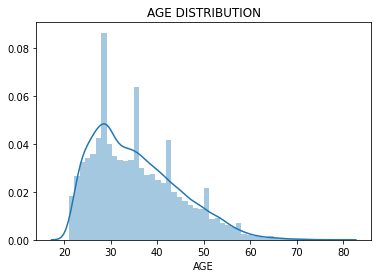

In [35]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(data["AGE"])
age_dist.set_title("AGE DISTRIBUTION")

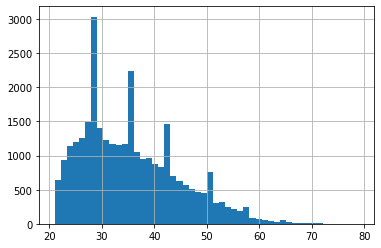

In [36]:
# Another way to plot a histogram of ages is shown below
data['AGE'].hist(bins=50)

In [37]:
data.groupby('SEX')['SEX'].count()

SEX
female    18217
male      11984
Name: SEX, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


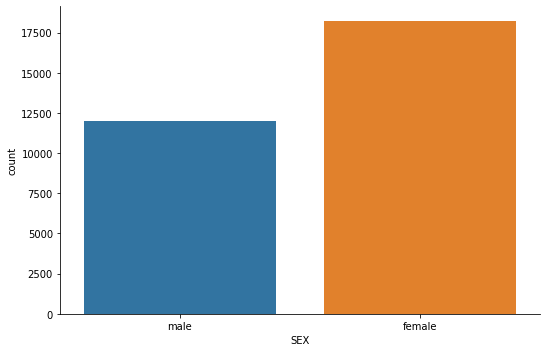

In [38]:
# Instead of a group by, use seaborn to plot the number of males and females
sns.factorplot('SEX', data=data, kind='count', aspect=1.5)

In [39]:
data.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
graduate school    10672
high school         4952
other                470
university         14107
Name: EDUCATION, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


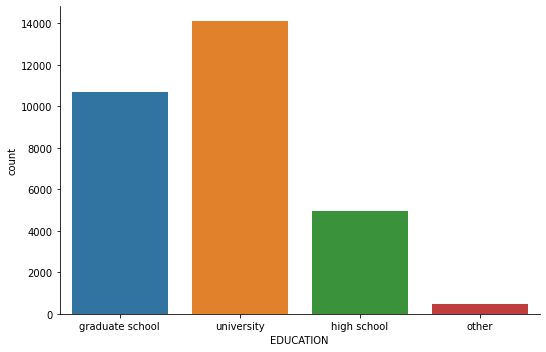

In [40]:
# Instead of a group by, use seaborn to plot the level of Education
sns.factorplot('EDUCATION', data=data, kind='count', aspect=1.5)

In [41]:
data.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13733
2    16088
3      326
Name: MARRIAGE, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


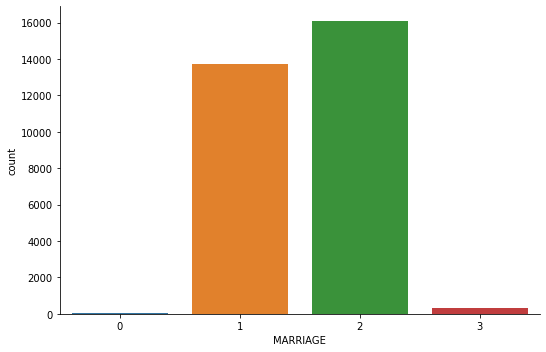

In [42]:
# Instead of a group by, use seaborn to plot the number of people that are married
sns.factorplot('MARRIAGE', data=data, kind='count', aspect=1.5)

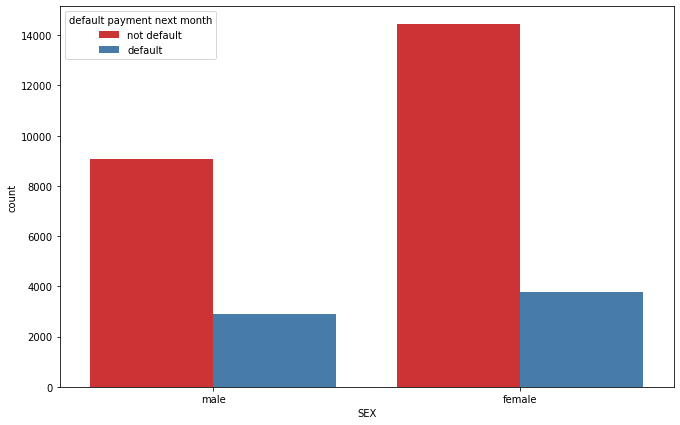

In [43]:
plt.figure(figsize=(11,7))
sns.countplot(x='SEX',hue='default payment next month',data=data,palette='Set1')

Exploratory Data Analysis.
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. This is a brief EDA because the project aims at Decision tree Ilustration

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#not default will ave the value 1 and default will have 0
data['default payment next month'] = le.fit_transform(data['default payment next month'])
data['default payment next month'].unique()
#Male will ave the value 1 and female will have 0
data['SEX'] = le.fit_transform(data['SEX'])
data['SEX'].unique()
data['EDUCATION'] = le.fit_transform(data['EDUCATION'])
data['EDUCATION'].unique()

array([0, 3, 1, 2])

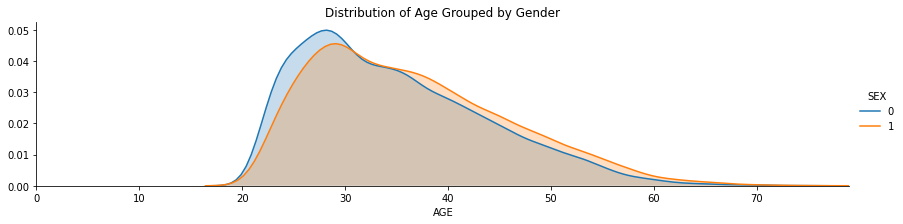

In [45]:
fig = sns.FacetGrid(data, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = data['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

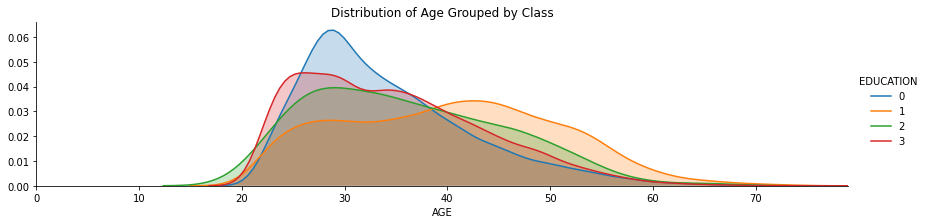

In [46]:
fig = sns.FacetGrid(data, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = data['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

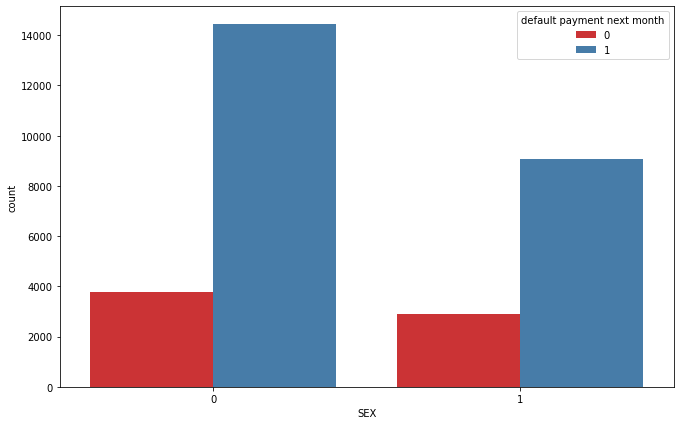

In [47]:
plt.figure(figsize=(11,7))
sns.countplot(x='SEX',hue='default payment next month',data=data,palette='Set1')

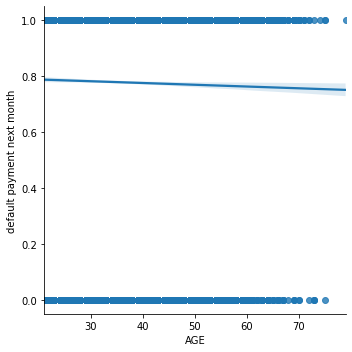

In [48]:
# Linear plot of age vs. default payment next month
sns.lmplot('AGE', 'default payment next month', data=data)

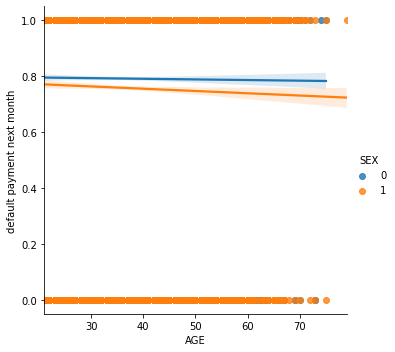

In [49]:
# default payment next month vs. Age grouped by Sex
sns.lmplot('AGE', 'default payment next month', data=data, hue='SEX')

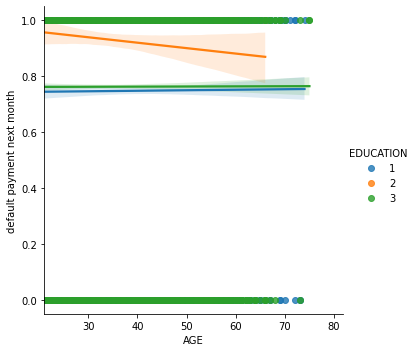

In [50]:
#default payment next month vs. Age gruped by Education
sns.lmplot('AGE', 'default payment next month', hue='EDUCATION', data=data, hue_order=range(1,4))

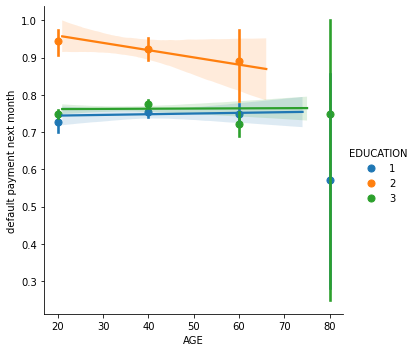

In [51]:
# Create a generation bin
generations = [10,20,40,60,80]
sns.lmplot('AGE','default payment next month',hue='EDUCATION',data=data,x_bins=generations, hue_order=[1,2,3])

### Importing LabelEncoder to transform non-numerical labels to numerical labels. Transform labels back to original encoding. Transform labels to normalized encoding.

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [53]:
# shows the first five column of our data
data.head()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,18449,18246,440000,1,0,1,79,0,0,0,0,0,0,429309,437906,447326,447112,438187,447543,15715,16519,16513,15800,16531,15677,1
1,450,247,250000,0,3,1,75,0,-1,-1,-1,-1,-1,52874,1631,1536,1010,5572,794,1631,1536,1010,5572,794,1184,1
2,25340,25137,180000,1,0,1,75,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,25345,25142,210000,1,3,1,75,0,0,0,0,0,0,205601,203957,199882,203776,205901,210006,9700,8810,9000,7300,7500,7600,1
4,29379,29176,160000,0,1,1,74,0,0,0,-1,-1,-1,79201,69376,66192,16905,0,19789,3783,2268,16905,0,19789,26442,1


#Transform labels to normalized encoding.

In [54]:
#not default will ave the value 1 and default will have 0
data['default payment next month'] = le.fit_transform(data['default payment next month'])
data['default payment next month'].unique()

array([1, 0])

In [55]:
#Male will have the value 1 and female will have 0
data['SEX'] = le.fit_transform(data['SEX'])
data['SEX'].unique()

array([1, 0])

In [56]:
data.head()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,18449,18246,440000,1,0,1,79,0,0,0,0,0,0,429309,437906,447326,447112,438187,447543,15715,16519,16513,15800,16531,15677,1
1,450,247,250000,0,3,1,75,0,-1,-1,-1,-1,-1,52874,1631,1536,1010,5572,794,1631,1536,1010,5572,794,1184,1
2,25340,25137,180000,1,0,1,75,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,25345,25142,210000,1,3,1,75,0,0,0,0,0,0,205601,203957,199882,203776,205901,210006,9700,8810,9000,7300,7500,7600,1
4,29379,29176,160000,0,1,1,74,0,0,0,-1,-1,-1,79201,69376,66192,16905,0,19789,3783,2268,16905,0,19789,26442,1


In [57]:
# Transforming the education label to normalized encoding
data['EDUCATION'] = le.fit_transform(data['EDUCATION'])
data['EDUCATION'].unique()

array([0, 3, 1, 2])

In [58]:
data.head()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,18449,18246,440000,1,0,1,79,0,0,0,0,0,0,429309,437906,447326,447112,438187,447543,15715,16519,16513,15800,16531,15677,1
1,450,247,250000,0,3,1,75,0,-1,-1,-1,-1,-1,52874,1631,1536,1010,5572,794,1631,1536,1010,5572,794,1184,1
2,25340,25137,180000,1,0,1,75,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,25345,25142,210000,1,3,1,75,0,0,0,0,0,0,205601,203957,199882,203776,205901,210006,9700,8810,9000,7300,7500,7600,1
4,29379,29176,160000,0,1,1,74,0,0,0,-1,-1,-1,79201,69376,66192,16905,0,19789,3783,2268,16905,0,19789,26442,1


#Find the correlation between data

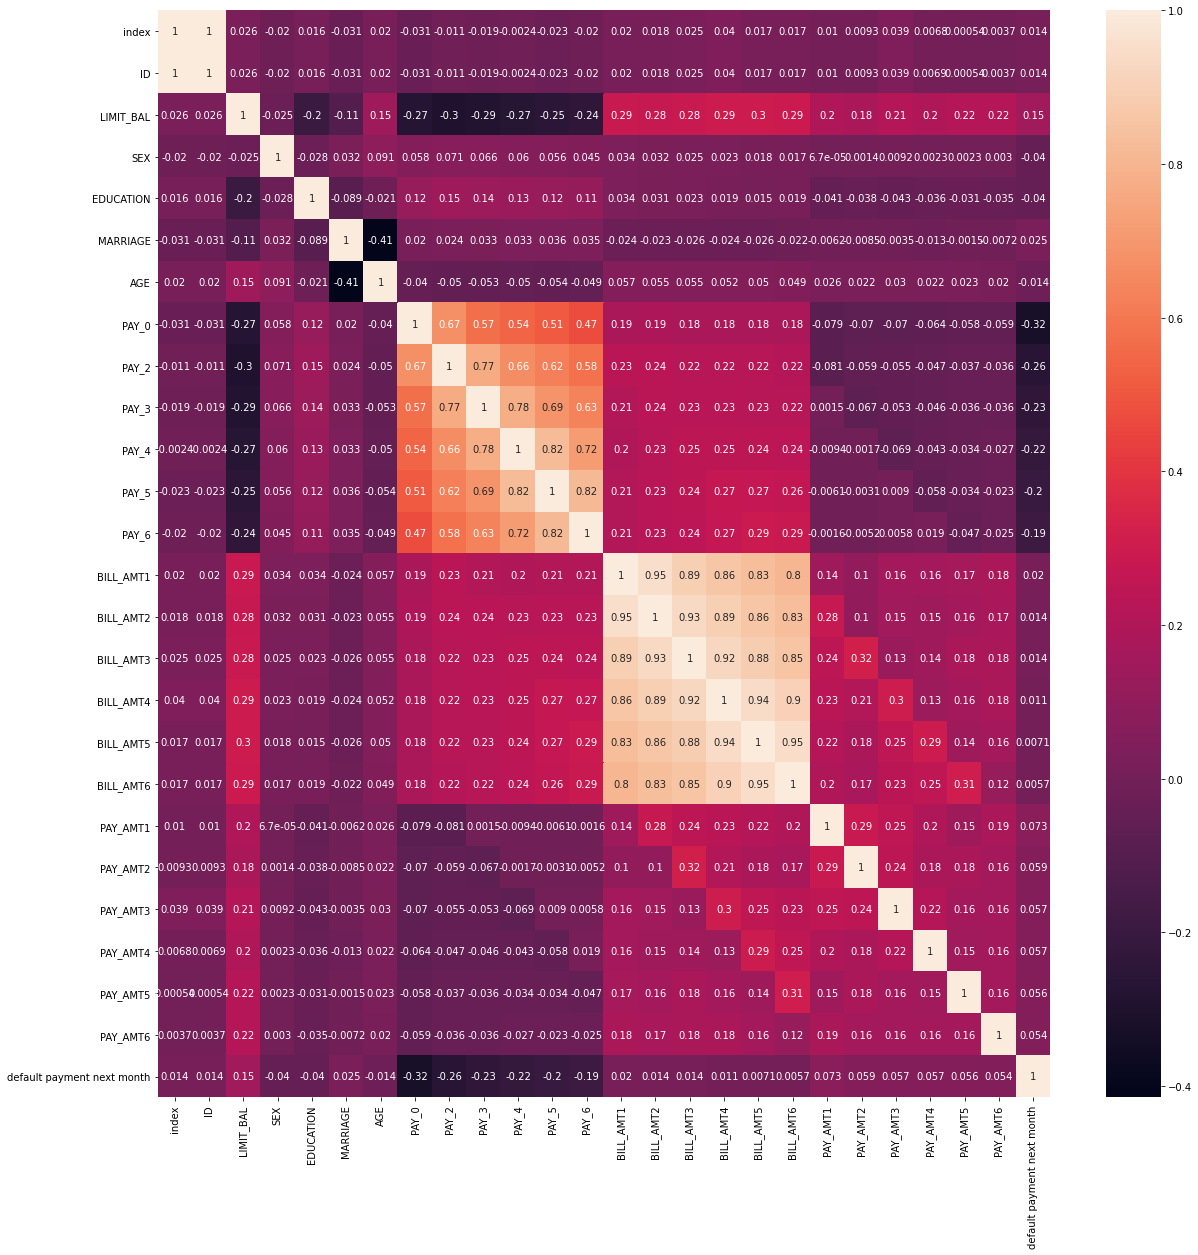

In [59]:
# Plotting a graph to visulize corfrelation using seaborn heatmap
corrmat=data.corr()
tf=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[tf].corr(), annot=True)

#feature selction 

In [60]:
# Importing train_test_split and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
X = data.drop('default payment next month', axis = 1)
y = data['default payment next month']

#Importing RFE to select the features number

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reache

In [62]:
from sklearn.feature_selection import RFE

In [63]:
# Initializing logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=500)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [64]:
XX = X[X.columns[rfe.support_]]

XX.head()

,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_5
0,1,0,0,0,0
1,1,0,-1,-1,-1
2,1,1,-2,-2,-2
3,1,0,0,0,0
4,1,0,0,0,-1


#Splitting The dataset

In [65]:
# we use train_test_split to split our dataset
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.4, random_state = 8, stratify = y)


#Training and fit the model

In [66]:
# Initializing logistic Regression and training the algorthm
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

#calulating the metrics


In [67]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [68]:
# Getting the confusion matrix i.e True positives,False positives,true negatives and false negatives
results = confusion_matrix(y_test,y_predict)

In [69]:
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[ 593 2080]
 [ 205 9203]]


In [70]:
print ('Accuracy Score :',accuracy_score(y_test, y_predict)) 
print ('Report : ')
#Classification  report has f1 score,precission ,recall and accuracy
print (classification_report(y_test, y_predict))

Accuracy Score : 0.8108600281433657
Report : 
              precision    recall  f1-score   support

           0       0.74      0.22      0.34      2673
           1       0.82      0.98      0.89      9408

    accuracy                           0.81     12081
   macro avg       0.78      0.60      0.62     12081
weighted avg       0.80      0.81      0.77     12081



In [71]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,1,1
1,1,0
2,1,0
3,1,0
4,1,1
...,...,...
12076,1,0
12077,1,1
12078,1,1
12079,1,1


In [72]:
print(data['default payment next month'])

0        1
1        1
2        0
3        1
4        1
        ..
30196    1
30197    1
30198    1
30199    1
30200    1
Name: default payment next month, Length: 30201, dtype: int64


In [73]:
print(data['SEX'])

0        1
1        0
2        1
3        1
4        0
        ..
30196    1
30197    0
30198    0
30199    0
30200    0
Name: SEX, Length: 30201, dtype: int64


In [74]:
data['default payment next month'] is data['SEX']

False